In [1]:
# Importing the usual libraries

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [3]:
# import dataset

df = pd.read_excel("SouthStyleData.xlsx")
df.head()

,Territory #,Sales (in 000s units),Market Potential (in 000s of units),# of Stores (in hundreds),# of dealers,# of Popular Brands,Population (in 000s)
0,1,10,16,8,7,12,71
1,2,8,12,6,6,13,59
2,3,45,28,19,36,6,135
3,4,58,43,19,49,2,149
4,5,10,14,6,12,13,70


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Territory #                          30 non-null     int64
 1   Sales (in 000s units)                30 non-null     int64
 2   Market Potential (in 000s of units)  30 non-null     int64
 3   # of Stores (in hundreds)            30 non-null     int64
 4   # of dealers                         30 non-null     int64
 5   # of Popular Brands                  30 non-null     int64
 6   Population (in 000s)                 30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


In [4]:
df.describe()

,Territory #,Sales (in 000s units),Market Potential (in 000s of units),# of Stores (in hundreds),# of dealers,# of Popular Brands,Population (in 000s)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,26.000000,20.300000,11.566667,22.300000,9.800000,97.200000
std,8.803408,17.610733,8.666821,5.083329,13.831872,4.413147,34.696119
min,1.000000,4.000000,6.000000,2.000000,2.000000,2.000000,45.000000
25%,8.250000,10.000000,15.000000,7.250000,9.750000,6.000000,68.000000
50%,15.500000,22.500000,17.500000,10.500000,20.000000,11.500000,92.500000
75%,22.750000,44.250000,26.750000,16.000000,34.000000,13.000000,133.750000
max,30.000000,58.000000,43.000000,19.000000,49.000000,16.000000,149.000000


In [10]:
df.columns

Index(['Territory #', 'Sales (in 000s units)',
       'Market Potential (in 000s of units)', '# of Stores (in hundreds)',
       '# of dealers', '# of Popular Brands', 'Population (in 000s)'],
      dtype='object')

In [11]:
df.columns = ['Territory', 'Sales(thousands)',
       'MarketPotential(thousands)', 'Stores(hundreds)',
       'dealers', 'PopularBrands', 'Population(thousands)']
df.head()

,Territory,Sales(thousands),MarketPotential(thousands),Stores(hundreds),dealers,PopularBrands,Population(thousands)
0,1,10,16,8,7,12,71
1,2,8,12,6,6,13,59
2,3,45,28,19,36,6,135
3,4,58,43,19,49,2,149
4,5,10,14,6,12,13,70


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Territory                   30 non-null     int64
 1   Sales(thousands)            30 non-null     int64
 2   MarketPotential(thousands)  30 non-null     int64
 3   Stores(hundreds)            30 non-null     int64
 4   dealers                     30 non-null     int64
 5   PopularBrands               30 non-null     int64
 6   Population(thousands)       30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


<AxesSubplot:xlabel='Sales(thousands)', ylabel='Count'>

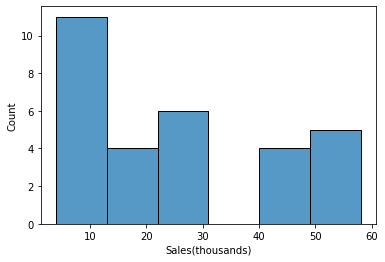

In [14]:
# Visualizing distribution (to understand central tendency) for
#1. Sales

sns.histplot(df["Sales(thousands)"], kde = False)

# skewed right

<AxesSubplot:xlabel='MarketPotential(thousands)', ylabel='Count'>

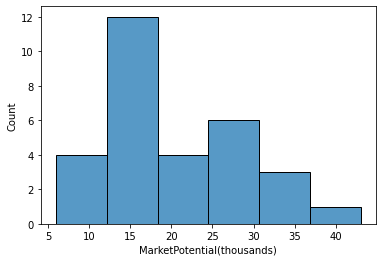

In [15]:
# Visualizing distribution (to understand central tendency) for
#2. Market Potential

sns.histplot(df["MarketPotential(thousands)"], kde = False)

# skewed right

<AxesSubplot:xlabel='Stores(hundreds)', ylabel='Count'>

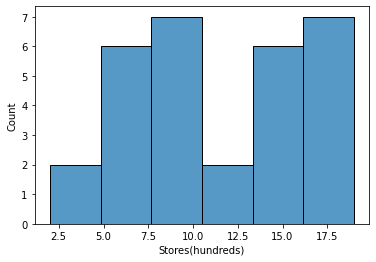

In [16]:
# Visualizing distribution (to understand central tendency) for
#3. # Stores

sns.histplot(df["Stores(hundreds)"], kde = False)

#bimodal

<AxesSubplot:xlabel='dealers', ylabel='Count'>

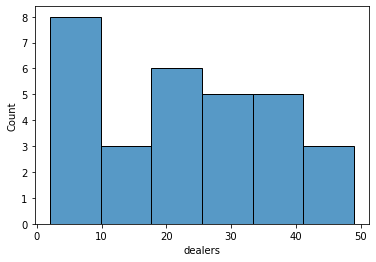

In [17]:
# Visualizing distribution (to understand central tendency) for
#4. # dealers

sns.histplot(df["dealers"], kde = False)

#skewed right

<AxesSubplot:xlabel='PopularBrands', ylabel='Count'>

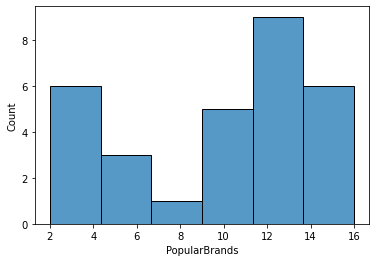

In [18]:
# Visualizing distribution (to understand central tendency) for
#5. popular brands

sns.histplot(df["PopularBrands"], kde = False)


<AxesSubplot:xlabel='Population(thousands)', ylabel='Count'>

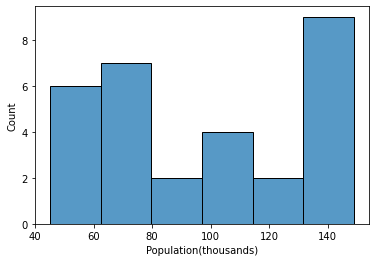

In [19]:
# Visualizing distribution (to understand central tendency) for
#5. population

sns.histplot(df["Population(thousands)"], kde = False)

# DATA ANALYSIS

In [20]:
#1. sales vs. market potential

df["Sales(thousands)"].groupby(df["MarketPotential(thousands)"]).mean()

#obvi

MarketPotential(thousands)
6      4.0
7      5.0
9      6.0
12     8.0
14    10.0
15    15.6
16    13.0
17    20.0
18    18.0
19    24.0
24    29.0
25    30.0
26    42.0
27    48.0
28    45.0
29    46.0
30    50.0
31    52.0
32    51.0
35    56.0
43    58.0
Name: Sales(thousands), dtype: float64

In [22]:
#2. sales vs. stores

df["Sales(thousands)"].groupby(df["Stores(hundreds)"]).mean()

#obvi

Stores(hundreds)
2      4.000000
4      5.000000
5      6.000000
6      9.000000
7     12.333333
8     12.666667
9     10.500000
10    24.500000
11    20.000000
13    29.000000
14    26.000000
15    35.000000
16    38.000000
17    48.500000
18    48.666667
19    51.500000
Name: Sales(thousands), dtype: float64

In [23]:
#3. sales vs. dealers

df["Sales(thousands)"].groupby(df["dealers"]).mean()

#obvi

dealers
2      4.0
3      5.0
4      8.0
5      6.0
6      8.0
7     10.0
8      9.0
9      9.0
12    10.0
14    11.0
17    12.0
18    18.0
19    19.5
20    25.5
21    24.0
26    26.0
27    28.0
28    25.0
29    29.0
31    42.0
35    46.0
36    45.0
38    48.0
39    50.0
40    52.0
42    51.0
45    56.0
49    58.0
Name: Sales(thousands), dtype: float64

In [24]:
#4. sales vs. popular brands

df["Sales(thousands)"].groupby(df["PopularBrands"]).mean()

#interesting... decrease in sales as increase in popular brands

PopularBrands
2     57.000000
3     51.500000
4     49.000000
5     46.000000
6     43.500000
8     28.000000
9     28.000000
11    13.000000
12    12.000000
13    14.333333
14     9.750000
16    16.500000
Name: Sales(thousands), dtype: float64

In [25]:
#5. sales vs. population

df["Sales(thousands)"].groupby(df["Population(thousands)"]).mean()

#obvious

Population(thousands)
45      5.0
56      4.0
58      9.0
59      8.0
62      8.0
67      9.0
68     13.5
70     14.5
71     10.0
73     11.0
80     20.0
85     21.0
100    24.0
102    26.0
103    25.0
114    28.0
115    29.0
123    30.0
133    42.0
134    46.0
135    45.0
139    48.0
140    50.0
145    52.0
146    51.0
148    56.0
149    58.0
Name: Sales(thousands), dtype: float64

In [29]:
df2 = df.copy()
df2.head()

,Territory,Sales(thousands),MarketPotential(thousands),Stores(hundreds),dealers,PopularBrands,Population(thousands)
0,1,10,16,8,7,12,71
1,2,8,12,6,6,13,59
2,3,45,28,19,36,6,135
3,4,58,43,19,49,2,149
4,5,10,14,6,12,13,70


In [30]:
df2.columns

Index(['Territory', 'Sales(thousands)', 'MarketPotential(thousands)',
       'Stores(hundreds)', 'dealers', 'PopularBrands',
       'Population(thousands)'],
      dtype='object')

In [31]:
df2.columns = ['Territory', 'Sales', 'MarketPotential',
       'Stores', 'Dealers', 'PopularBrands',
       'Population']
df2.head()

,Territory,Sales,MarketPotential,Stores,Dealers,PopularBrands,Population
0,1,10,16,8,7,12,71
1,2,8,12,6,6,13,59
2,3,45,28,19,36,6,135
3,4,58,43,19,49,2,149
4,5,10,14,6,12,13,70


# REGRESSION

In [32]:
result = sm.ols("Sales ~ MarketPotential +  Stores + Dealers + PopularBrands + Population", data = df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     312.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           5.11e-21
Time:                        20:29:36   Log-Likelihood:                -65.250
No. Observations:                  30   AIC:                             142.5
Df Residuals:                      24   BIC:                             150.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1867      5.735     -0.033      0.974     -12.023      11.650
MarketPotential     0.2560      0.146      1.748      0.093      -0.046       0.558
Stores              0.2227      0.278      0.801      0.431      -0.351       0.796
Dealers             0.4564      0.119      3.838      0.001       0.211       0.702
PopularBrands      -0.6953      0.267     -2.601      0.016      -1.247      -0.144
Population          0.1548      0.058      2.686      0.013       0.036       0.274
==============================================================================
Omnibus:                        4.176   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.263
Skew:                          -0.808   Prob(JB):                        0.196
Kurtosis:                       3.037   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
result2 = sm.ols("Sales ~ MarketPotential +  Stores + Dealers + PopularBrands + Population - 1", data = df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1070.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    2.65e-28
Time:                        20:30:08   Log-Likelihood:                         -65.251
No. Observations:                  30   AIC:                                      140.5
Df Residuals:                      25   BIC:                                      147.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MarketPotential     0.2543      0.134      1.893      0.070      -0.022       0.531
Stores              0.2269      0.241      0.941      0.356      -0.270       0.723
Dealers             0.4567      0.116      3.927      0.001       0.217       0.696
PopularBrands      -0.7034      0.093     -7.580      0.000      -0.895      -0.512
Population          0.1535      0.041      3.758      0.001       0.069       0.238
==============================================================================
Omnibus:                        4.172   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.245
Skew:                          -0.805   Prob(JB):                        0.197
Kurtosis:                       3.047   Cond. No.                         63.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
result3 = sm.ols("Sales ~ MarketPotential + Dealers + PopularBrands + Population", data = df2).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     396.0
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           3.28e-22
Time:                        20:30:41   Log-Likelihood:                -65.646
No. Observations:                  30   AIC:                             141.3
Df Residuals:                      25   BIC:                             148.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3250      5.040     -0.461      0.649     -12.704       8.054
MarketPotential     0.2680      0.145      1.853      0.076      -0.030       0.566
Dealers             0.4810      0.114      4.216      0.000       0.246       0.716
PopularBrands      -0.5926      0.233     -2.544      0.018      -1.072      -0.113
Population          0.1848      0.044      4.248      0.000       0.095       0.274
==============================================================================
Omnibus:                        4.580   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.841
Skew:                          -0.875   Prob(JB):                        0.147
Kurtosis:                       2.905   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
result4 = sm.ols("Sales ~ MarketPotential + Dealers + PopularBrands + Population -1", data = df2).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1344.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    1.04e-29
Time:                        20:31:19   Log-Likelihood:                         -65.773
No. Observations:                  30   AIC:                                      139.5
Df Residuals:                      26   BIC:                                      145.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MarketPotential     0.2450      0.134      1.832      0.078      -0.030       0.520
Dealers             0.4922      0.110      4.485      0.000       0.267       0.718
PopularBrands      -0.6911      0.092     -7.539      0.000      -0.880      -0.503
Population          0.1733      0.035      4.950      0.000       0.101       0.245
==============================================================================
Omnibus:                        4.238   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.407
Skew:                          -0.825   Prob(JB):                        0.182
Kurtosis:                       2.976   Cond. No.                         39.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result5 = sm.ols("Sales ~ Dealers + PopularBrands + Population", data = df2).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     481.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           6.79e-23
Time:                        20:31:42   Log-Likelihood:                -67.576
No. Observations:                  30   AIC:                             143.2
Df Residuals:                      26   BIC:                             148.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8965      4.946      0.181      0.858      -9.271      11.064
Dealers           0.5724      0.108      5.322      0.000       0.351       0.793
PopularBrands    -0.7074      0.235     -3.013      0.006      -1.190      -0.225
Population        0.1983      0.045      4.419      0.000       0.106       0.291
==============================================================================
Omnibus:                        8.461   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.053
Skew:                          -1.142   Prob(JB):                       0.0294
Kurtosis:                       3.653   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# FORMULA

In [ ]:
# sales = 0.8965 + 0.5724(#dealers) - 0.7074(#popularbrands) + 0.1983(population)

In [37]:
result5.predict({
    "Dealers": 58,
    "PopularBrands": 2,
    "Population": 150
})

0    62.419706
dtype: float64

In [39]:
result5.predict({
    "Dealers": 58,
    "PopularBrands": 1,
    "Population": 150
})

0    63.127079
dtype: float64

In [40]:
result5.predict({
    "Dealers": 57,
    "PopularBrands": 1,
    "Population": 150
})

0    62.554714
dtype: float64

In [43]:
result5.predict({
    "Dealers": 60,
    "PopularBrands": 2,
    "Population": 100
})

0    53.650821
dtype: float64

# SOME VISUALS

In [44]:
# bin number of dealers
bins = [0, 10, 20, 30, 40, 50]

dealerLabels = ["0-9", "10-19","20-29","30-39","40-50"]

df2["DealerLevels"] = pd.cut(df2["Dealers"], bins, labels = dealerLabels)
df2.head()

,Territory,Sales,MarketPotential,Stores,Dealers,PopularBrands,Population,DealerLevels
0,1,10,16,8,7,12,71,0-9
1,2,8,12,6,6,13,59,0-9
2,3,45,28,19,36,6,135,30-39
3,4,58,43,19,49,2,149,40-50
4,5,10,14,6,12,13,70,10-19


Text(0.5, 1.0, 'Sales by Number of Dealers and Number of Popular Brands')

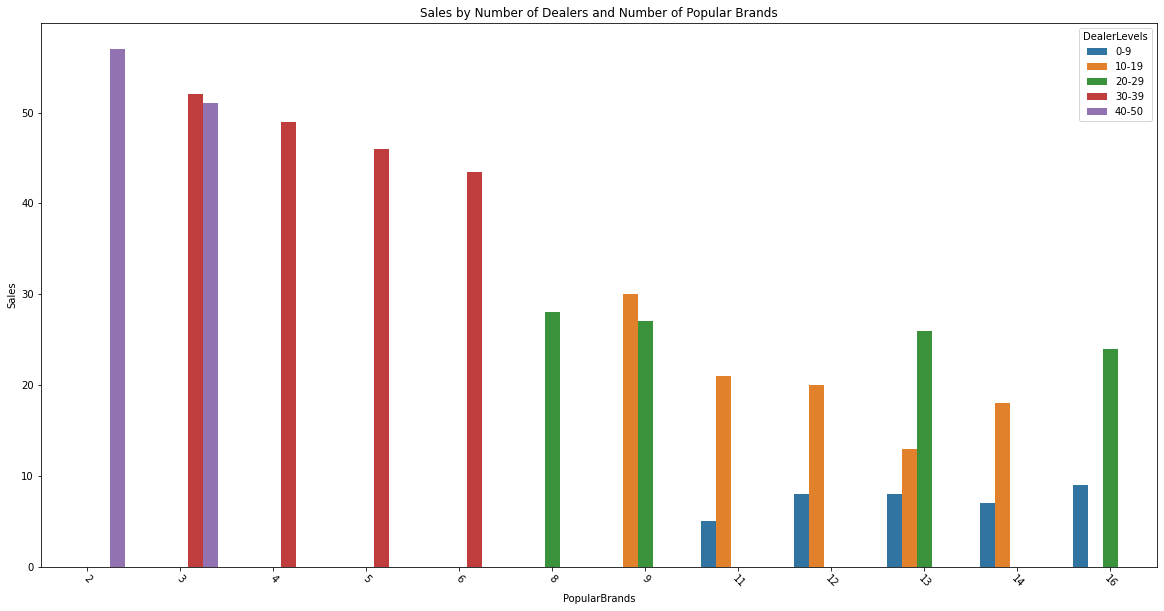

In [49]:
# barplot showing sales per #dealers

plt.figure(figsize=(20,10))

sns.barplot(data = df2, x = "PopularBrands", y = "Sales", hue = "DealerLevels", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales by Number of Dealers and Number of Popular Brands')


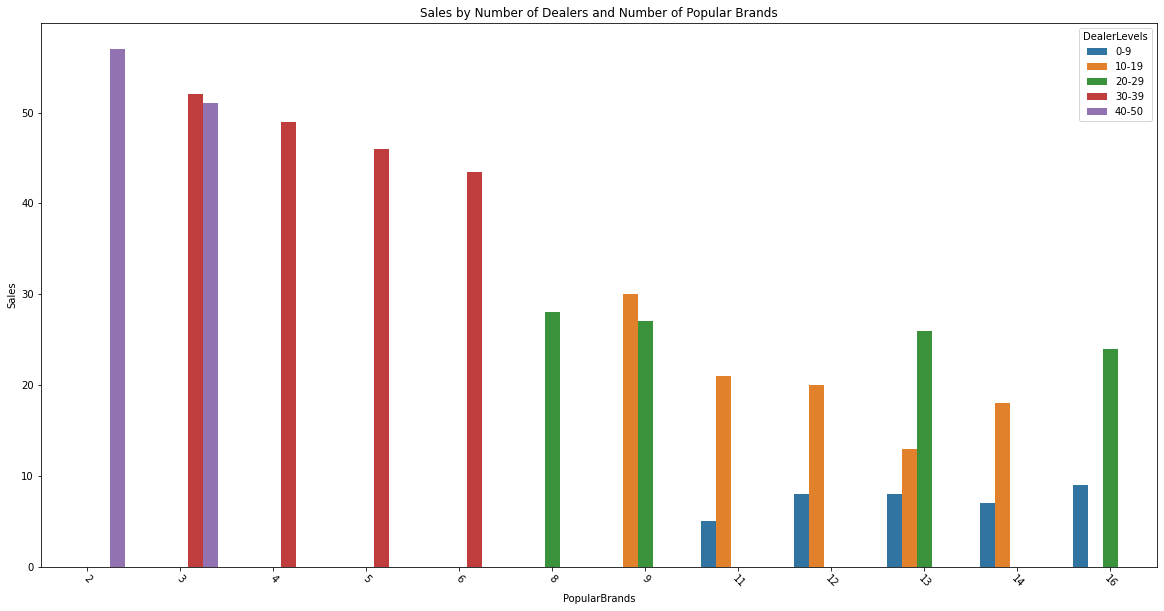

In [56]:
# barplot showing sales per #dealers and #popbrands

plt.figure(figsize=(20,10))

snsbar = sns.barplot(data = df2, x = "PopularBrands", y = "Sales", hue = "DealerLevels", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales by Number of Dealers and Number of Popular Brands')

#save the image as png
plt.savefig("SalesPopBrandDealers.png")

In [52]:
#to export visual
#
#plt.savefig("SalesPopBrandDealers.png")

AttributeError: 'AxesSubplot' object has no attribute 'getfigure'

<Figure size 432x288 with 0 Axes>

In [54]:
# bin number of popular brands
bins = [0, 3, 6, 9, 12, 15, 18]

popBrands = ["0-2", "3-5","6-8","9-11","12-14","15-18"]

df2["PopularBrandLevels"] = pd.cut(df2["PopularBrands"], bins, labels = popBrands)
df2.head()

#same as before

,Territory,Sales,MarketPotential,Stores,Dealers,PopularBrands,Population,DealerLevels,PopularBrandLevels
0,1,10,16,8,7,12,71,0-9,9-11
1,2,8,12,6,6,13,59,0-9,12-14
2,3,45,28,19,36,6,135,30-39,3-5
3,4,58,43,19,49,2,149,40-50,0-2
4,5,10,14,6,12,13,70,10-19,12-14


Text(0.5, 1.0, 'Sales by Number of Dealers and Number of Popular Brands')

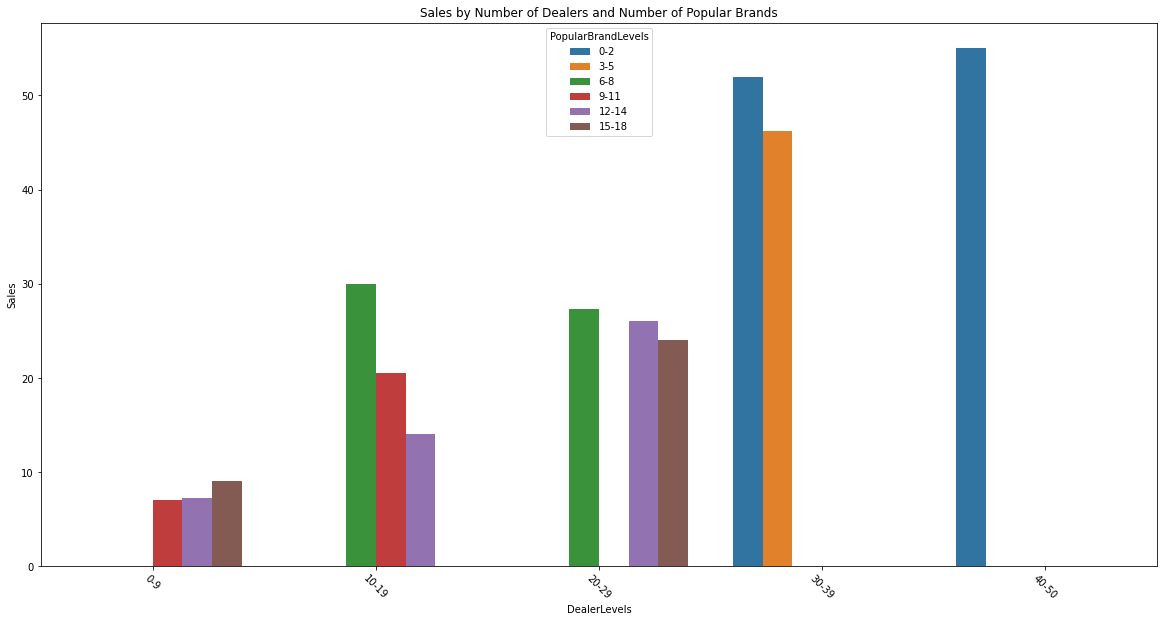

In [55]:
# barplot showing sales per #dealers

plt.figure(figsize=(20,10))

snsbar = sns.barplot(data = df2, x = "DealerLevels", y = "Sales", hue = "PopularBrandLevels", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales by Number of Dealers and Number of Popular Brands')